# Maxwellian Distributions

Figure 3.2 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot showing Maxwellian distributions for $\rho_e$=100, 300, and 1000 g/cm<sup>4</sup>, along with
a curve of the maximum number of states allowed by Fermi-Dirac statistics.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig3_2.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Maxwellian Distribution

The Maxwellian distribution is (Eqn 3.40)

$F_\textrm{M}(E)dE=\frac{2}{\sqrt\pi}\left(\frac{E}{kT}\right)^{1/2}\exp\left(-\frac{E}{kT}\right)\frac{dE}{kT}$

At a given energy, E, the maximum number density of states permitted for electrons by Fermi-Dirac statistics
is (Eqn 3.36):

$n_\textrm{state}(E)dE=\frac{8\pi\sqrt{2}}{\lambda_\textrm{C}^3}\left(\frac{E}{m c^2}\right)^{1/2}\frac{dE}{mc^2}$

In [3]:
# CODATA 2018 physical constants 

h = 4.135667696e-15 # Planck constant in eV/Hz or 6.62607015e-34 J/Hz
k = 8.617333262e-5 # Boltzmann constant in eV/K
c = 299792458 # speed of light in a vacuum in m/s

m_e = 5.1099895e5 # electron mass in eV = m_e*c^2
m_h = 1.67262192369e-24 # proton mass in g

# temperature

T = 1.0e7 # Kelvin

kT = k*T # thermal energy in eV
#print(kT)

# Compton wavelength of electron

lambda_e = 100 * h*c/m_e # cm, m_e in eV 

# range of u=E/kT

uMin = 0.0
uMax = 6.0

u = np.linspace(uMin,uMax,1001)

# normalization factor for the maximum number of states permitted for electrons by F-D statistics 

n_state = (8*np.pi*math.sqrt(2.0)/lambda_e**3/m_e)*math.sqrt(kT/m_e)

# overall normalization for the plots in cm^-3 eV^-1

norm = 1.0e-23

# Maxwellian distributions

f_max = (2.0/math.sqrt(np.pi))*np.sqrt(u)*np.exp(-u)/kT

f100 = f_max*(100.0/m_h)*norm
f300 = f_max*(300.0/m_h)*norm
f1000 = f_max*(1000.0/m_h)*norm

# Maximum number of electrons states permited by F-D statistics

nMax = n_state*np.sqrt(u)*norm


### Figure 3.2


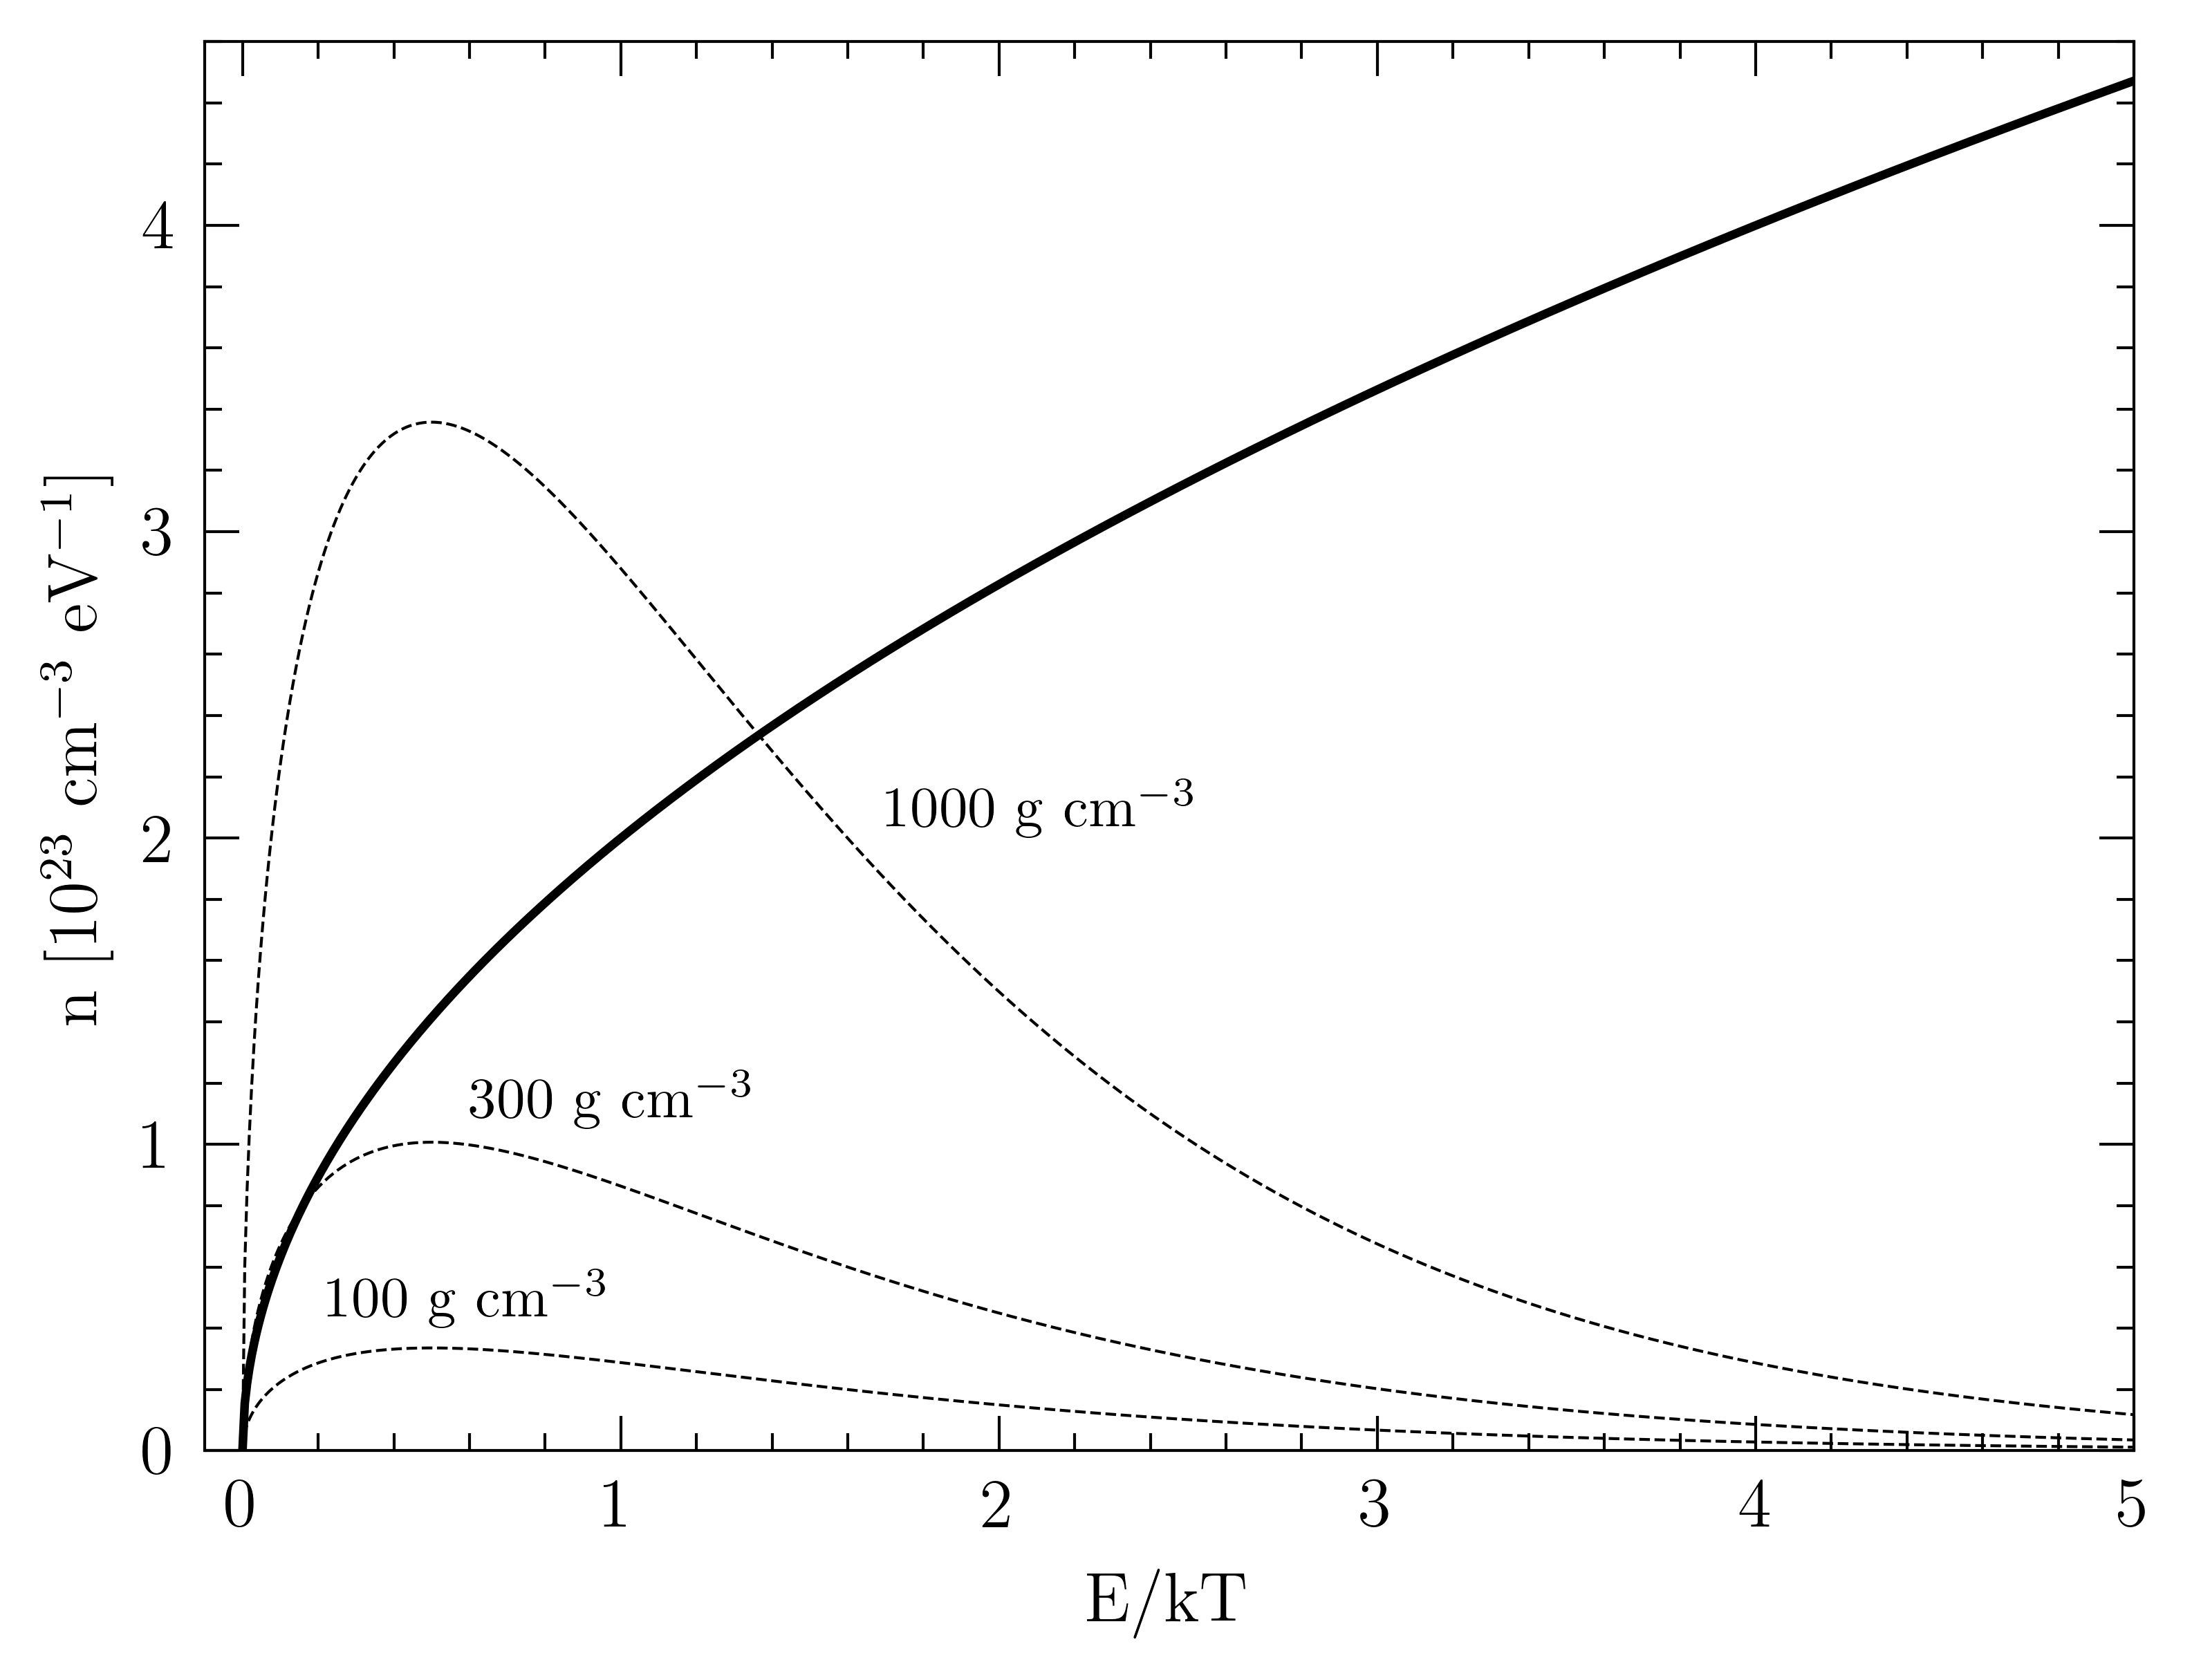

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(-0.1,5.0)
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xlabel(r'E/kT',fontsize=axisFontSize)

ax.set_ylim(0.0,4.6)
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_ylabel(r'n [10$^{23}$ cm$^{-3}$ eV$^{-1}$]',fontsize=axisFontSize)

ax.plot(u,f100,'--',color='black',lw=0.5,zorder=10)
ax.text(0.6,0.4,r'100 g cm$^{-3}$',ha='center',va='bottom',fontsize=10)

ax.plot(u,f300,'--',color='black',lw=0.5,zorder=10)
ax.text(0.6,1.05,r'300 g cm$^{-3}$',ha='left',va='bottom',fontsize=10)

ax.plot(u,f1000,'--',color='black',lw=0.5,zorder=10)
ax.text(1.7,2.0,r'1000 g cm$^{-3}$',ha='left',va='bottom',fontsize=10)

ax.plot(u,nMax,'-',color='black',lw=1.5,zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')